In [1]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(color_codes=True)
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay
from sklearn import preprocessing

In [2]:
df = pd.read_csv('../datasets/Mall_Customers.csv')

In [3]:
# Map genders to numbers
gender_map = {'Male': 0, 'Female': 1}
pd.set_option('future.no_silent_downcasting', True)
df['Gender'] = df['Gender'].replace(gender_map)

In [4]:
# Define spending categories based on score thresholds
def categorize_spending(score):
    if score < 33:
        return 'Low'
    elif score <= 66:
        return 'Medium'
    else:
        return 'High'

In [5]:
# Apply the categorization function to create a new column 'Spending Category'
df['Spending Category'] = df['Spending Score (1-100)'].apply(categorize_spending)
df.drop(columns=['CustomerID'], inplace=True)
df.drop(columns=['Spending Score (1-100)'], inplace=True)

              precision    recall  f1-score   support

        High       0.40      0.57      0.47         7
         Low       1.00      0.31      0.47        13
      Medium       0.73      0.95      0.83        20

    accuracy                           0.68        40
   macro avg       0.71      0.61      0.59        40
weighted avg       0.76      0.68      0.65        40



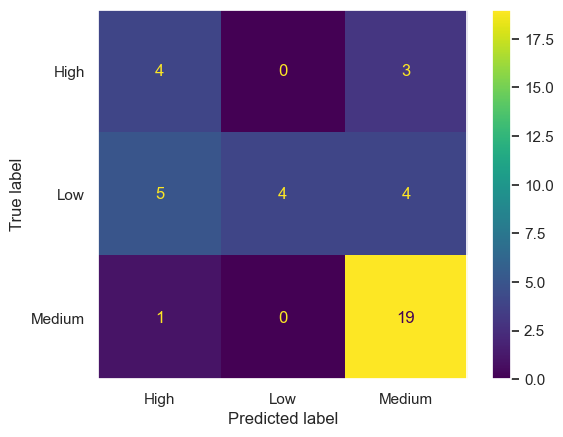

In [6]:
### RBF SVM ###
data = df.copy()
X = data.drop(columns=['Spending Category'])
y = data['Spending Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

svc_li = SVC(kernel='rbf')

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)

Z_svm_train = scaler.transform(X_train)
Z_svm_test = scaler.transform(X_test)

svc_li.fit(Z_svm_train, np.asarray(y_train))
predictions = svc_li.predict(Z_svm_test)

print(classification_report(y_test, predictions))

cm = confusion_matrix(y_test, svc_li.predict(Z_svm_test))
ConfusionMatrixDisplay(cm,display_labels=svc_li.classes_).plot()
plt.grid(False)